In [2]:
##Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.decomposition import PCA as RandomizedPCA
import seaborn as sns

In [3]:
##Loading the dataset 
df = pd.read_csv('C:/Users/Yuvraj/Documents/Jupyter/out_pat_data.csv')
df.head(10)

,Unnamed: 0,X,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,1,1,66154,25312,118,68,22.730000,0,Caucasian,M,...,0,1,0,0,0,0,0,Sepsis,Cardiovascular,0
1,2,2,114252,59342,81,77,27.420000,0,Caucasian,F,...,0,1,0,0,0,0,0,Respiratory,Respiratory,0
2,3,3,119783,50777,118,25,31.950000,0,Caucasian,F,...,0,0,0,0,0,0,0,Metabolic,Metabolic,0
3,4,4,79267,46918,118,81,22.640000,1,Caucasian,F,...,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular,0
4,5,5,92056,34377,33,65,27.654655,0,Caucasian,M,...,0,0,0,0,0,0,0,Trauma,Trauma,0
5,6,6,33181,74489,83,67,27.560000,0,Caucasian,M,...,0,1,0,0,0,0,0,Neurological,Neurologic,0
6,7,7,82208,49526,83,59,27.623893,0,Caucasian,F,...,0,1,0,0,0,0,0,Respiratory,Respiratory,0
7,8,8,120995,50129,33,70,27.654655,0,Caucasian,M,...,0,0,0,1,0,0,0,Sepsis,Cardiovascular,0
8,9,9,80471,10577,118,45,27.654655,0,Caucasian,M,...,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular,1
9,10,10,42871,90749,118,50,25.710000,0,Caucasian,M,...,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular,0


In [4]:
##Dropping unnecessary cols 
df.drop(['X','Unnamed: 0','encounter_id','patient_id','hospital_id','icu_id'], inplace = True, axis = 1)

In [5]:
##Subsetting numerical cols of dataframe into new dataframe 
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('Numerical Cols=',num_cols)

Numerical Cols= Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
       'h1_s

In [6]:
##Selecting numerical cols for PCA purpose into a new dataframe 
df1 = df[['age','bmi','pre_icu_los_days','apache_2_diagnosis','apache_3j_diagnosis','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','heart_rate_apache','map_apache','resprate_apache','temp_apache','d1_diasbp_max',
         'd1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
         'd1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min','h1_resprate_max','h1_resprate_min',
         'h1_spo2_max','h1_spo2_min','h1_sysbp_max','h1_sysbp_min']]
print(df1)

       age        bmi  pre_icu_los_days  apache_2_diagnosis  \
0       68  22.730000          0.541667                 113   
1       77  27.420000          0.927778                 108   
2       25  31.950000          0.000694                 122   
3       81  22.640000          0.000694                 203   
4       65  27.654655          0.073611                 119   
...    ...        ...               ...                 ...   
91708   75  23.060250          0.298611                 113   
91709   56  27.623893          0.120139                 113   
91710   48  27.236914          0.046528                 123   
91711   65  23.297481          0.081944                 108   
91712   82  22.031250          0.018056                 304   

       apache_3j_diagnosis  gcs_eyes_apache  gcs_motor_apache  \
0                   502.01                3                 6   
1                   203.01                1                 3   
2                   703.03                3     

In [7]:
## Dimensions of the dataframe subset
df1.shape

(91713, 42)

In [8]:
##Standardising the numerical data in order to get a normal scale 
df_st =  StandardScaler().fit_transform(df1)  
#Storing the normalised data in another dataframe
df_n = pd.DataFrame(df_st,columns = ['age','bmi','pre_icu_los_days','apache_2_diagnosis','apache_3j_diagnosis','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','heart_rate_apache','map_apache','resprate_apache','temp_apache','d1_diasbp_max',
         'd1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
         'd1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min','h1_resprate_max','h1_resprate_min',
         'h1_spo2_max','h1_spo2_min','h1_sysbp_max','h1_sysbp_min'] )
df_n.head(10)

,age,bmi,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,heart_rate_apache,map_apache,...,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min
0,0.325726,-0.869462,2.244227,-0.831561,0.019909,-0.503917,0.405462,-0.01007,0.622033,-1.141607,...,-0.381858,0.048923,1.403538,1.324007,0.788892,0.304110,0.869682,-0.045765,-0.031150,-0.022000
1,0.892508,-0.104762,4.463747,-0.889914,-0.756698,-2.620603,-1.943480,-1.94489,0.691554,-0.998273,...,-0.816957,-0.937537,1.151881,0.901826,1.688984,2.569943,-1.857045,-0.045765,-1.478728,-1.791665
2,-2.382236,0.633851,-0.865497,-0.726526,0.542028,-0.503917,0.405462,0.63487,0.065864,-0.472717,...,0.861283,-0.279897,0.245916,-0.259171,-0.291217,-0.149057,-0.221009,-1.726157,0.652428,0.339977
3,1.144412,-0.884137,-0.865497,0.218791,1.848494,0.554426,0.405462,0.63487,0.482991,-0.663828,...,-0.754800,-1.200594,0.447242,0.690736,-1.731363,-1.281973,0.869682,0.962470,0.169902,-0.383977
4,0.136798,-0.066502,-0.446343,-0.761538,0.277047,0.554426,0.405462,0.63487,-1.394081,0.363396,...,1.545010,0.377743,-0.106403,-0.364716,-0.111199,-0.149057,0.869682,1.298548,-0.071361,0.179099
5,0.262750,-0.081935,-0.865497,1.362508,-0.237229,0.554426,0.405462,0.63487,0.448230,1.008397,...,0.923440,1.758788,-0.408391,0.004692,-1.731363,-1.055390,-0.766354,0.290313,0.451376,1.104151
6,-0.241057,-0.071517,-0.865497,-0.889914,-0.756698,0.554426,0.405462,0.63487,1.143442,1.199509,...,2.042266,1.101148,-0.609717,-0.575807,-0.651254,0.304110,0.869682,1.298548,2.381479,1.908544
7,0.451677,-0.066502,-0.857513,-0.831561,0.017416,0.554426,0.405462,0.63487,0.691554,-0.663828,...,-0.008916,-0.477189,1.353207,1.640642,1.148929,2.116776,-1.311699,-1.390079,-0.513676,-0.383977
8,-1.122719,-0.066502,-0.817594,-0.796550,-1.016433,0.554426,0.405462,0.63487,-0.629348,-0.520495,...,-0.568329,-0.214133,-0.458723,-0.048081,0.428856,0.530693,-0.766354,0.290313,-1.116833,-0.705734
9,-0.807840,-0.383576,-0.522190,-0.843232,-1.006044,0.554426,0.405462,0.63487,-0.212221,-0.711606,...,0.550498,-0.082605,0.245916,-1.209078,1.328947,0.077526,0.869682,-0.045765,0.129692,-0.504636


In [9]:
##Applying PCA to find PCA's components 
pca_n = PCA().fit(df_n)
components = pca_n.transform(df_n)

In [10]:
##Calculating the component variance 
pca_n.explained_variance_ratio_

array([1.92848390e-01, 1.14194183e-01, 9.20031792e-02, 6.58420601e-02,
       4.99872815e-02, 4.47095383e-02, 3.88534887e-02, 3.64301322e-02,
       3.11256951e-02, 2.49183422e-02, 2.46820863e-02, 2.36077040e-02,
       2.19157096e-02, 2.02170785e-02, 1.82530404e-02, 1.74993369e-02,
       1.63077558e-02, 1.49523165e-02, 1.48309979e-02, 1.42846293e-02,
       1.28324547e-02, 1.24231306e-02, 1.10232472e-02, 9.73971374e-03,
       9.03163622e-03, 8.35811283e-03, 8.22129252e-03, 7.47345058e-03,
       7.13355064e-03, 6.92469035e-03, 5.88490878e-03, 5.08851084e-03,
       4.46101060e-03, 4.19883667e-03, 2.95645882e-03, 2.74694734e-03,
       2.17374192e-03, 8.35415347e-04, 5.00418410e-04, 2.84130956e-04,
       1.59497493e-04, 8.58985207e-05])

In [11]:
## Calculation of cumulative proportion of variance
np.cumsum(pca_n.explained_variance_ratio_)

array([0.19284839, 0.30704257, 0.39904575, 0.46488781, 0.51487509,
       0.55958463, 0.59843812, 0.63486825, 0.66599395, 0.69091229,
       0.71559438, 0.73920208, 0.76111779, 0.78133487, 0.79958791,
       0.81708725, 0.833395  , 0.84834732, 0.86317832, 0.87746294,
       0.8902954 , 0.90271853, 0.91374178, 0.92348149, 0.93251313,
       0.94087124, 0.94909253, 0.95656598, 0.96369953, 0.97062422,
       0.97650913, 0.98159764, 0.98605865, 0.99025749, 0.99321395,
       0.9959609 , 0.99813464, 0.99897005, 0.99947047, 0.9997546 ,
       0.9999141 , 1.        ])

In [13]:
##Loadings of each PCA components 
loadings = pd.DataFrame(pca_n.components_.T,
columns=['PC%s' % _ for _ in range(len(df_n.columns))],
index=df_n.columns)
print(loadings)

                                PC0       PC1       PC2       PC3       PC4  \
age                        0.038230 -0.033286  0.128251 -0.135424  0.179042   
bmi                       -0.029187 -0.005467  0.021920 -0.052189 -0.013686   
pre_icu_los_days           0.018629 -0.034583 -0.028071  0.005894 -0.070339   
apache_2_diagnosis        -0.019947 -0.107004  0.016894  0.073173 -0.114890   
apache_3j_diagnosis        0.045856 -0.074837 -0.032808  0.155913 -0.141850   
gcs_eyes_apache           -0.047172 -0.111775 -0.091211 -0.422431 -0.305095   
gcs_motor_apache          -0.043696 -0.105756 -0.084934 -0.402570 -0.309467   
gcs_verbal_apache         -0.051668 -0.116587 -0.086296 -0.412548 -0.285122   
heart_rate_apache          0.020866  0.316198 -0.196127  0.082081 -0.145927   
map_apache                -0.210652  0.041047  0.040380  0.035109  0.045660   
resprate_apache           -0.027676  0.153555 -0.104557 -0.152837  0.328977   
temp_apache               -0.022242  0.046021 -0.111

In [14]:
loadings


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
age,0.038230,-0.033286,0.128251,-0.135424,0.179042,-0.007410,0.049728,0.267426,0.186063,-0.282409,...,0.013822,-0.019792,0.007355,0.002014,-0.000858,-0.001673,0.000173,-0.001326,-0.001406,-0.000198
bmi,-0.029187,-0.005467,0.021920,-0.052189,-0.013686,-0.079249,0.167555,-0.010380,-0.015478,0.430762,...,0.006775,0.006611,0.002228,-0.000261,-0.000027,-0.000408,0.000209,-0.000806,-0.000306,0.000149
pre_icu_los_days,0.018629,-0.034583,-0.028071,0.005894,-0.070339,-0.013966,0.040011,0.190936,-0.103636,0.280482,...,0.003261,-0.001834,-0.000288,-0.002953,-0.002462,-0.000598,0.000413,0.000556,-0.000086,0.000145
apache_2_diagnosis,-0.019947,-0.107004,0.016894,0.073173,-0.114890,-0.027495,0.150301,0.337155,-0.220074,0.390372,...,-0.011854,-0.004744,-0.000389,0.003552,-0.002082,0.000695,-0.000633,-0.000057,-0.000909,-0.000130
apache_3j_diagnosis,0.045856,-0.074837,-0.032808,0.155913,-0.141850,-0.013103,0.187095,0.406878,-0.252542,0.177790,...,-0.007046,-0.002785,-0.006727,0.002232,0.006506,-0.003733,-0.001381,-0.006297,-0.004375,0.001086
gcs_eyes_apache,-0.047172,-0.111775,-0.091211,-0.422431,-0.305095,0.066587,-0.175287,0.099136,-0.057530,-0.039501,...,-0.026721,0.798732,-0.009572,-0.010891,-0.004278,0.000676,0.001273,0.000603,-0.000273,-0.000279
gcs_motor_apache,-0.043696,-0.105756,-0.084934,-0.402570,-0.309467,0.055532,-0.164003,0.115931,-0.065381,-0.035174,...,0.016700,-0.477215,0.003379,0.001782,-0.009359,-0.000739,-0.002849,0.000334,0.000949,0.000257
gcs_verbal_apache,-0.051668,-0.116587,-0.086296,-0.412548,-0.285122,0.064348,-0.153167,0.040656,-0.044200,-0.033595,...,0.019363,-0.355189,0.013616,0.003848,0.005133,-0.000741,0.000274,-0.000700,0.000934,0.000599
heart_rate_apache,0.020866,0.316198,-0.196127,0.082081,-0.145927,0.073074,0.035025,0.096211,0.072067,-0.088527,...,-0.609889,-0.013475,0.056849,0.076213,-0.005375,0.002627,0.001167,0.000209,-0.000406,0.000078
map_apache,-0.210652,0.041047,0.040380,0.035109,0.045660,0.018333,0.041363,0.075045,-0.087245,-0.061064,...,0.017724,-0.008355,-0.000220,-0.006502,-0.016499,0.001685,0.002091,0.005333,0.000873,0.000042


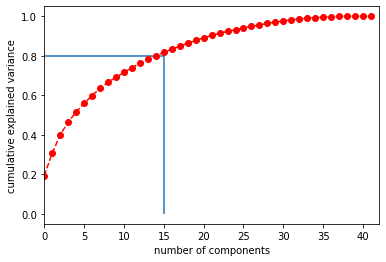

In [15]:
##Plotting Cumalative values of PCs and adding a 80% threshold line.
plt.plot(np.cumsum(pca_n.explained_variance_ratio_), marker='o', linestyle='--', color='r',)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.xlim(0,42)
plt.hlines(y=0.8, xmin=0, xmax=15)
plt.vlines(x=15, ymin=0, ymax=0.8)

ValueError: x and y must have same first dimension, but have shapes (14,) and (42,)

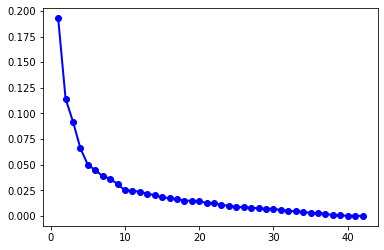

In [18]:
##Screeplot of PCs
PC_values = np.arange(pca_n.n_components_) + 1
plt.plot(PC_values, pca_n.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

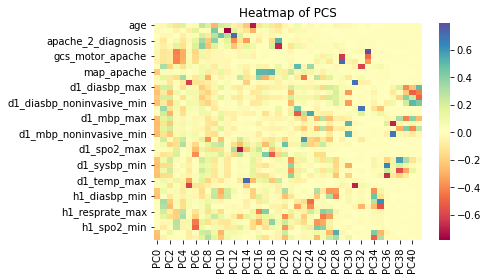

In [30]:
##Heatmap of PCs 
ax = sns.heatmap(loadings, cmap='Spectral')
plt.title('Heatmap of PCS')
plt.show()


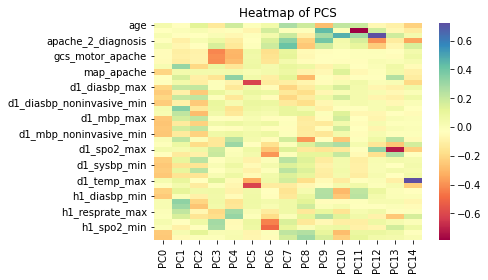

In [32]:
loadings_15 = pd.DataFrame(loadings[loadings.columns[0:15]])
loadings_15
ax = sns.heatmap(loadings_15, cmap='Spectral')
plt.title('Heatmap of PCS')
plt.show()

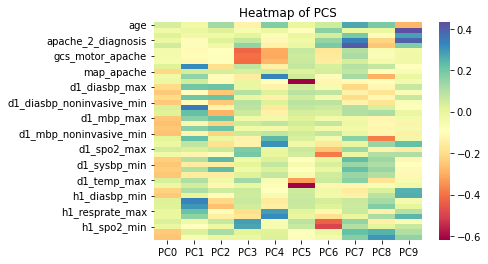

In [28]:
loadings_10 = pd.DataFrame(loadings[loadings.columns[0:10]])
loadings_10
ax = sns.heatmap(loadings_10, cmap='Spectral')
plt.title('Heatmap of PCS')
plt.show()

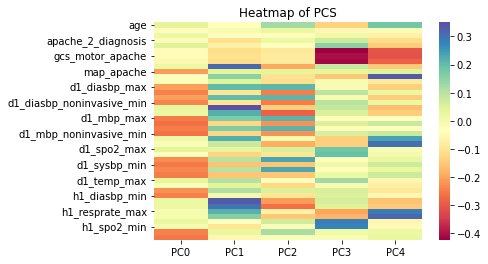

In [26]:
loadings_5 = pd.DataFrame(loadings[loadings.columns[0:5]])
loadings_5
ax = sns.heatmap(loadings_5, cmap='Spectral')
plt.title('Heatmap of PCS')
plt.show()